# TOFPET charge with LEDs

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pylab as plt
from matplotlib import colors
%matplotlib inline

# Process Data

In [2]:
files = glob('/analysis/11902/hdf5/proc/linear_interp/files/*h5')
files.sort()
files

['/analysis/11902/hdf5/proc/linear_interp/files/run_11902_0000_trigger1_waveforms.h5']

In [3]:
store = pd.HDFStore(files[0], 'r')
store.keys()

['/data_0', '/data_1']

In [4]:
df = pd.read_hdf(files[0],'data_0')
df

,evt_number,ctdaq,ct_data,tofpet_id,channel_id,sensor_id,tac_id,tcoarse,ecoarse,tfine,efine,intg_w,efine_corrected
0,1,3244697314,6,0,63,67,3,5763,723,277,224,80,7.0
1,1,3244697314,6,0,28,14,2,46880,880,344,189,80,7.8
2,1,3244697314,7,0,32,84,2,32391,727,248,196,80,7.6
3,1,3244697314,7,0,50,82,1,32848,160,274,196,80,7.6
4,1,3244697314,7,0,11,18,1,48621,573,254,158,80,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499953,13172,1711773555,10,0,37,52,2,2536,568,298,156,80,8.2
499954,13172,1711773555,10,0,8,31,3,4510,494,202,237,80,5.2
499955,13172,1711773555,10,0,47,62,2,5115,75,219,133,80,5.0
499956,13172,1711773555,10,0,1,46,3,17279,975,285,214,80,7.8


**Check tofpet_id, channels_id and integration window size**

In [157]:
df.tofpet_id.unique()

array([0], dtype=uint8)

Text(0, 0.5, 'Entries')

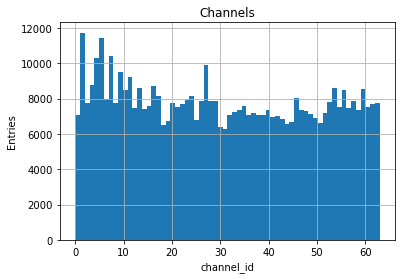

In [5]:
df.channel_id.hist(bins = 64)
plt.title('Channels')
plt.xlabel('channel_id')
plt.ylabel('Entries')

There are  82  different integration windows:
[ 79  80  83  95 101 105 108 110 111 112 113 114 115 116 117 118 119 120
 121 122 124 126 128 129 130 131 132 133 134 135 136 139 140 141 142 144
 147 148 151 152 154 156 157 160 161 163 164 169 171 172 173 176 177 181
 182 191 195 199 203 210 211 213 215 222 223 225 233 235 237 241 244 246
 254 270 286 288 292 294 300 302 312 525]


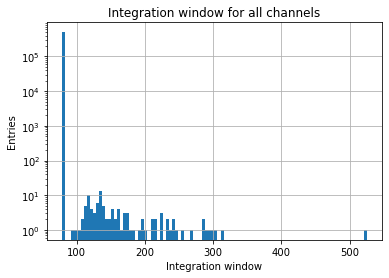

In [7]:
df.intg_w.hist(bins = 100)
plt.title('Integration window for all channels')
plt.xlabel('Integration window')
plt.ylabel('Entries')
plt.yscale('log')

intg_w_unique = df.intg_w.unique()
intg_w_unique.sort()
print('There are ', len(intg_w_unique), ' different integration windows:')
print(intg_w_unique)

# Studying all channels

**Efine corrected for all channels**

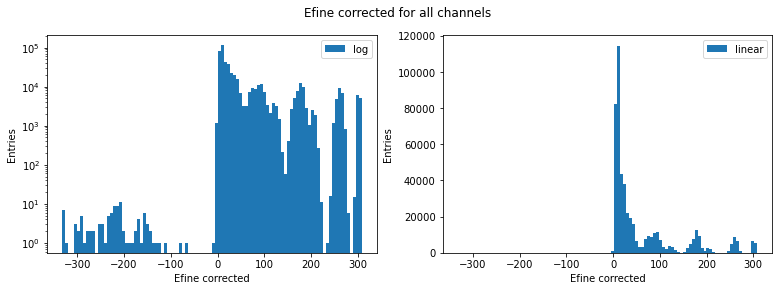

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

fig.suptitle('Efine corrected for all channels')
ax1.hist(df.efine_corrected, bins = 100, label = 'log')
ax1.set_yscale('log')
ax1.set_xlabel('Efine corrected')
ax1.set_ylabel('Entries')
ax1.legend()

ax2.hist(df.efine_corrected, bins = 100, label = 'linear')
ax2.set_xlabel('Efine corrected')
ax2.set_ylabel('Entries')
ax2.legend()

**Efine corrected for all channels selecting the fixed integration window size**

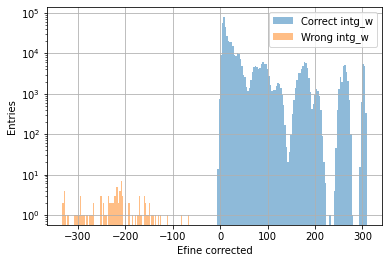

In [9]:
df[(df['intg_w'] < 85) & (df['intg_w'] > 75)].efine_corrected.hist(bins = 100, alpha = 0.5,label = 'Correct intg_w')
df[(df['intg_w'] > 85)].efine_corrected.hist(bins = 100, alpha = 0.5, label = 'Wrong intg_w')

plt.yscale('log')
plt.xlabel('Efine corrected')
plt.ylabel('Entries')
plt.legend()

# Studying central channels

**Integration window for central channels**

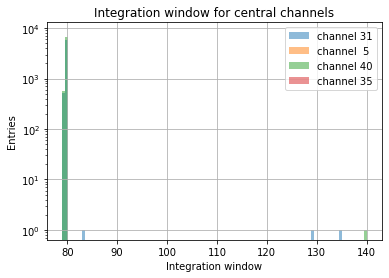

In [13]:
df[df['channel_id'] == 31].intg_w.hist(bins = 100, label = 'channel 31', alpha = 0.5)
df[df['channel_id'] ==  5].intg_w.hist(bins = 100, label = 'channel  5', alpha = 0.5)
df[df['channel_id'] == 40].intg_w.hist(bins = 100, label = 'channel 40', alpha = 0.5)
df[df['channel_id'] == 35].intg_w.hist(bins = 100, label = 'channel 35', alpha = 0.5)

plt.legend()
plt.title('Integration window for central channels')
plt.xlabel('Integration window')
plt.ylabel('Entries')
plt.yscale('log')

**Efine corrected for central channels**

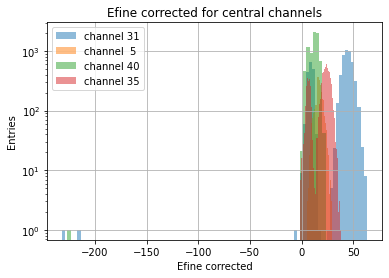

In [12]:
df[df['channel_id'] == 31].efine_corrected.hist(bins = 100, label = 'channel 31', alpha = 0.5)
df[df['channel_id'] ==  5].efine_corrected.hist(bins = 100, label = 'channel  5', alpha = 0.5)
df[df['channel_id'] == 40].efine_corrected.hist(bins =  80, label = 'channel 40', alpha = 0.5)
df[df['channel_id'] == 35].efine_corrected.hist(bins =  40, label = 'channel 35', alpha = 0.5)

plt.legend()
plt.title('Efine corrected for central channels')
plt.xlabel('Efine corrected')
plt.ylabel('Entries')
plt.yscale('log')

# Studying corner channels

**Integration window for corner channels**

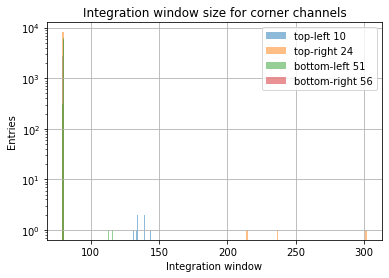

In [14]:
df[df['channel_id'] == 10].intg_w.hist(bins = 100, label = 'top-left 10', alpha = 0.5)
df[df['channel_id'] == 24].intg_w.hist(bins = 200, label = 'top-right 24', alpha = 0.5)
df[df['channel_id'] == 51].intg_w.hist(bins = 100, label = 'bottom-left 51', alpha = 0.5)
df[df['channel_id'] == 56].intg_w.hist(bins = 100, label = 'bottom-right 56', alpha = 0.5)

plt.title('Integration window size for corner channels')
plt.xlabel('Integration window')
plt.ylabel('Entries')
plt.yscale('log')
plt.legend()

**Efine corrected for corner channels**

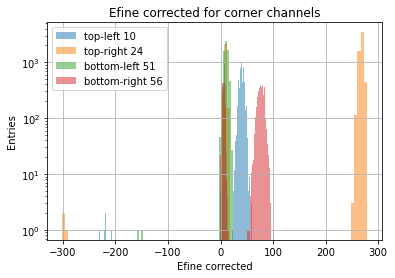

In [15]:
df[df['channel_id'] == 10].efine_corrected.hist(bins = 200, label = 'top-left 10', alpha = 0.5)
df[df['channel_id'] == 24].efine_corrected.hist(bins = 100, label = 'top-right 24', alpha = 0.5)
df[df['channel_id'] == 51].efine_corrected.hist(bins =  50, label = 'bottom-left 51', alpha = 0.5)
df[df['channel_id'] == 56].efine_corrected.hist(bins = 100, label = 'bottom-right 56', alpha = 0.5)

plt.title('Efine corrected for corner channels')
plt.xlabel('Efine corrected')
plt.ylabel('Entries')
plt.yscale('log')
plt.legend()

# **Colour map variables**

In [16]:
df_filtered = df[(df['intg_w'] > 75) & (df['intg_w'] < 85)]
print('Number of sensors: ',len(df_filtered.sensor_id.unique()))

Number of sensors:  64


Text(0.5, 1.0, 'Efine corrected for channel 34')

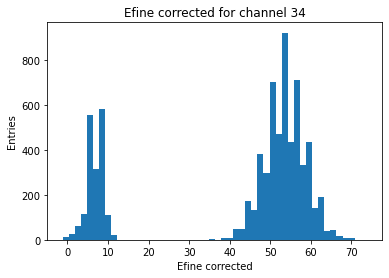

In [34]:
plt.hist(df_filtered[df_filtered['channel_id'] == 34].efine_corrected, bins = 50)
plt.xlabel('Efine corrected')
plt.ylabel('Entries')
plt.title('Efine corrected for channel 34')

In [35]:
def filtered_mean(df):
    '''In each channel we have got two well differentiated 
    distributions. With this function, we filter the gaussian
    which is due to LED contribution only.'''
    
    mean_vector = 0
    if df.mean() > 30:
        mean_vector = df[df > 30].mean()
    elif df.mean() < 30:
        mean_vector = df.mean()
        
    return mean_vector
        

In [36]:
channel_sums  = df_filtered.groupby('sensor_id')['efine_corrected'].sum().reset_index()
charge_sum    = np.array(channel_sums['efine_corrected']).reshape(8,8)

channel_means = df_filtered.groupby('sensor_id')['efine_corrected'].apply(filtered_mean).reset_index()
charge_mean   = np.array(channel_means['efine_corrected']).reshape(8,8)

In [37]:
channel_means.efine_corrected.mean()

78.06400937422241

**Sum of the charge per channel**

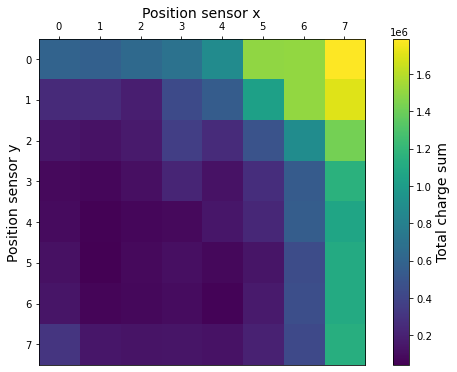

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax      = plt.imshow(charge_sum)

cbar    = plt.colorbar()
cbar.set_label('Total charge sum', fontsize = 14)

plt.xlabel('Position sensor x', fontsize = 14)
plt.xticks(np.arange(0, 8, 1))
plt.ylabel('Position sensor y', fontsize = 14)
plt.yticks(np.arange(0, 8, 1))

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

**Mean charge per channel**

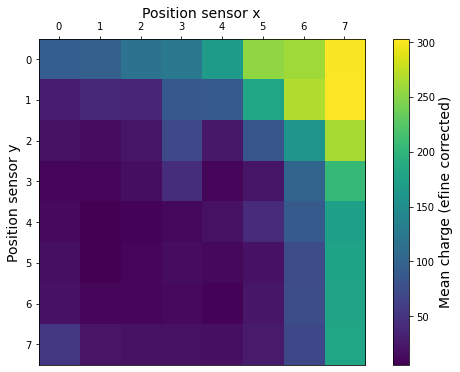

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax      = plt.imshow(charge_mean)

cbar    = plt.colorbar()
cbar.set_label('Mean charge (efine corrected)', fontsize = 14)

plt.xlabel('Position sensor x', fontsize = 14)
plt.xticks(np.arange(0, 8, 1))
plt.ylabel('Position sensor y', fontsize = 14)
plt.yticks(np.arange(0, 8, 1))

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

**TOFPET mean efine corrected**

In [41]:
sensor_id_efine_corr_mean = df_filtered.groupby('sensor_id')['efine_corrected'].mean().reset_index()
tofpet_mean_efine_correct = sensor_id_efine_corr_mean['efine_corrected'].sum()
print('The TOFPET mean efine corrected read is: ',tofpet_mean_efine_correct)

The TOFPET mean efine corrected read is:  3749.9868769185055
